# <a id='0'>ReSys</h1>
![ReSys-logo](..\src\utils\img\movies.jpg)

- ## <a href='#1'>1. Introduccion</a> 

<b></b>
- ##  <a href='#2'>2. Analisis Exploratio de Datos (EDA)</a>

    - ###  <a href='#2.1.'>2.1. Limpieza de Datos</a>
    - ###  <a href='#2.2.'>2.2. Analisis de Datos</a>

<b></b>
- ##  <a href='#3'>3. Visualizacion de Datos</a>

<b></b>
- ##  <a href='#4'>4. Funcion</a>

# <a id='1'>1. Introduccion</a>

#### El siguiente proyecto es para crear un sistema de recomendacion de peliculas utilizando python.

Este EDA consiste en analizar los datos y extraer información valiosa de ellos.

El objetivo es aplicar algunas técnicas de limpieza de datos para crear una estructura de datos accesible para el equipo de ciencia de datos, para que puedan aplicar sus modelos.

Para lograrlo, los datos deben ser no solo limpios, sino también ordenados y coherentes.


### Si necesita contactarme:
* Email: **jamr1989@gmail.com**
* Linkedin: **https://www.linkedin.com/in/JuanManiglia**

#### Check my repo in Github: **https://github.com/JuanManiglia**

# <a id='2'>2. Exploratory Data Analysis (EDA)</a> 

### Descripción general

Nuestros datos consisten en:
 * Datos en formato csv (`tmdb_5000_movies.csv`)
    - CSV con la informacion de 5000 peliculas.
 * Datos en formato csv (`tmdb_5000_credits.csv`)
    - CSV con la información de los creditos de 5000 peliculas.

In [2]:
# Librerias Necesarias
######## Modulos Creados ########
from utils import config # Config parametros
from utils.folders import Folders, Saver # Modulo para trabajar con carpetas y guardar archivos
from utils.data_mining import DataAnalyzer # Modulo para el Analisis de Datos
from utils.visualization import Viz # Modulo para la Visualizacion

######## Modulos de Python ########
# Para Data Analisis
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab --no-import-all inline

# para evitar advertencias
import warnings
warnings.filterwarnings("ignore")

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


Populating the interactive namespace from numpy and matplotlib


Primero, accedemos al directorio raíz para importar los módulos correctamente y lidiar con nuestra estructura de carpetas.

In [3]:
Folders.append_path(jupyter=True)

Then, we read the data from our directory
With the `read_directory_data()` method, we store all the data in dictionary keys, and we can access them easily with only 1 line of code

In [4]:
data = Folders.read_directory_data(path=config.DATA_PATH)

Las siguientes variables ya están listas para usarse:
{'csv': [['tmdb_5000_credits', 'tmdb_5000_movies']], 'xlsx': [[]]}


## <a id='2.1.'>2.1. Limpieza de Datos</a> 
Antes de extraer información de los datos, es obligatorio echar un vistazo a su estructura y verificar si hay algunos valores raros, así como valores faltantes o tipos de datos incorrectos asignados a una columna específica.

En esta etapa, se analizarán todos los conjuntos de datos para corregirlos. El proceso será muy similar para cada uno de ellos.

#### Empecemos con `tmdb_5000_movies`

In [5]:
tmdb_5000_movies = data['tmdb_5000_movies']
display(tmdb_5000_movies.head())

DataAnalyzer.df_info(tmdb_5000_movies)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 4803
Numero de Columnas: 20

#### COLUMNA DEL DATAFRAME ####
 Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-nul

En este caso, parece que los datos están formateados correctamente, pero los nombres de las columnas se convertirán a minúsculas para que sean más accesibles.

In [6]:
SP500 = DataAnalyzer.cols_to_lowercase(df=tmdb_5000_movies)

Ahora todo parece estar bien

In [7]:
tmdb_5000_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Empecemos con `tmdb_5000_credits`

In [8]:
tmdb_5000_credits = data['tmdb_5000_credits']
display(tmdb_5000_credits.head())

DataAnalyzer.df_info(tmdb_5000_credits)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 4803
Numero de Columnas: 4

#### COLUMNA DEL DATAFRAME ####
 Index(['movie_id', 'title', 'cast', 'crew'], dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB

 None

### TOTAL DE VALORES NaN ###


 movie_id    0
title       0
cast        0
crew        0
dtype: int64

### CHEQUEO DE DUPLICADOS ###
 False: 0


En este caso, parece que los datos están formateados correctamente, pero los nombres de las columnas se convertirán a minúsculas para que sean más accesibles.

In [9]:
SP500 = DataAnalyzer.cols_to_lowercase(df=tmdb_5000_credits)

Ahora todo parece estar bien

In [10]:
tmdb_5000_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## <a id='2.2.'>2.2. Analisis de Datos</a>

- Lo primero que debemos hacer es:
    - Unir los datasets.

<b></b>

- Luego vamos a ordenar nuestro Dataframe de la siguiente manera:
    - Cambiando los nombres de las columnas. 
    - Cambiando el orden de la columnas.

<b></b>

- Seguido por:
    - Verificar nuestra columna de fechas para determinar si no hay faltantes y si los hay determinar la razon.
    - Verificar la distribución de los valores para ver si hay algunos valores atípicos que podrían desequilibrar nuestros datos.

<b></b>

- Finalmente:
    - Revisar Outlier.

Veamos que tan frecuentes son nuestros valores

In [11]:
DataAnalyzer.get_df_value_counts(df=tmdb_5000_movies)

###### CANTIDAD DE VALORES DIFERENTES EN EL DATAFRAME ######

budget: 436
genres: 1175
homepage: 1691
id: 4803
keywords: 4222
original_language: 37
original_title: 4801
overview: 4800
popularity: 4802
production_companies: 3697
production_countries: 469
release_date: 3280
revenue: 3297
runtime: 156
spoken_languages: 544
status: 3
tagline: 3944
title: 4800
vote_average: 71
vote_count: 1609


In [12]:
DataAnalyzer.get_df_value_counts(df=tmdb_5000_credits)

###### CANTIDAD DE VALORES DIFERENTES EN EL DATAFRAME ######

movie_id: 4803
title: 4800
cast: 4761
crew: 4776


In [13]:
tmdb_5000_credits_renamed = tmdb_5000_credits.rename(index=str, columns={"movie_id": "id"})
tmdb_5000 = tmdb_5000_movies.merge(tmdb_5000_credits_renamed, on='id')
tmdb_5000.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
peliculas = tmdb_5000.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])

In [15]:
DataAnalyzer.df_info(peliculas)

####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 4803
Numero de Columnas: 18

#### COLUMNA DEL DATAFRAME ####
 Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 no

Por ultimo vamos a transformar en formato fecha la columna fecha

In [22]:
peliculas['release_date'] = pd.to_datetime(peliculas['release_date'])

## Finalmente, guardaremos nuestros datos.

### Ahora el equipo de Data Scientist tiene todos los conjuntos de datos condensados ​​en un archivo con el formato adecuado y listo para entrenar un modelo.

In [27]:
Saver.save_output_file(df=peliculas, path=config.OUTPUT_PATH, filename='peliculas')

Se ha guardado el siguiente archivo:
peliculas

Lo puedes encontrar aquí: ..\data\output\peliculas.csv


In [28]:
DataAnalyzer.df_info(peliculas)

####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 4803
Numero de Columnas: 18

#### COLUMNA DEL DATAFRAME ####
 Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   original_title        4803 non-

#  <a id='3'>3. Visualizacion de Datos</a>

### Una vez que nuestros datos están estructurados, es hora de hacer una visualización de datos para tener una idea coherente de ellos.

##### Ahora que tenemos los datos en el formato correcto para el departamento de Data Science, haremos algunas visualizaciones de los datos.

###  <a id='3.1.'>3.1. Perfil de Reporte</a>
#### Para tener un conocimiento más profundo de nuestros datos, usaremos el método `pandas_profiling.ProfileReport ()` para obtener fácilmente una idea más profunda de ambos conjuntos de datos.

In [29]:
# Asignar variables para cada conjunto de datos
peliculas_report = ProfileReport(peliculas, title= 'peliculas Report', explorative=True)

# Save them in the reports folder
peliculas_report.to_file(config.REPORTS_PATH + config.SEP + 'peliculas Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 68.60it/s]


In [27]:
# peliculas_report

###  <a id='3.2.'>3.2. Visualizaciones</a>


#### Es hora de analizar los datos ya limpios. En esta etapa haremos algunas visualizaciones.:
- Heatmap para ver correlaciones entre variables.


### Heatmap

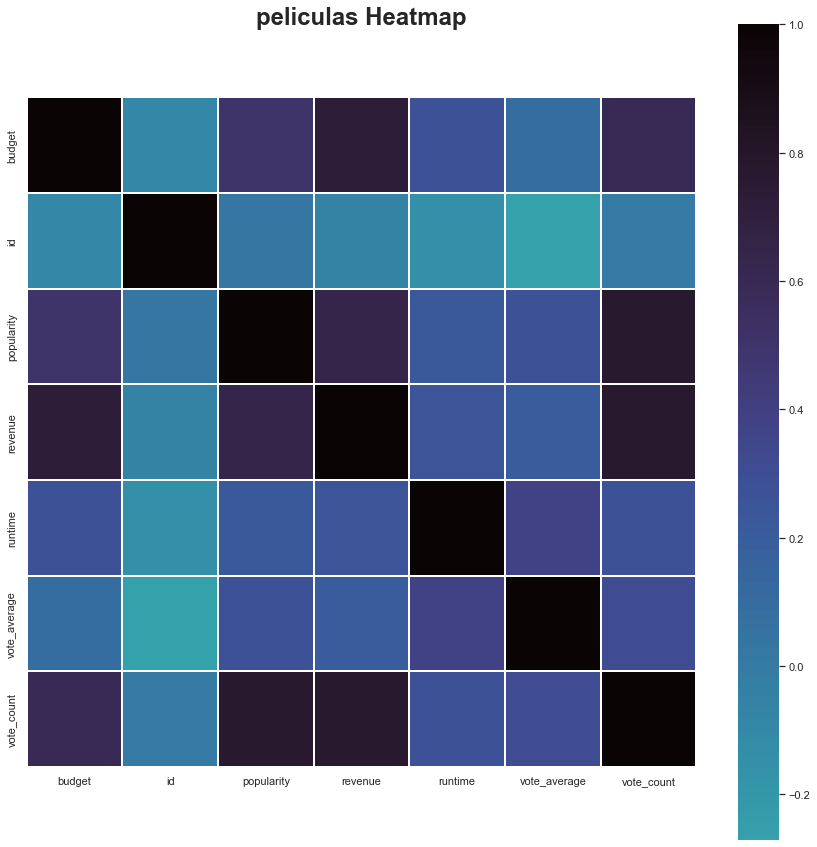

In [30]:
Viz.draw_heatmap(df_corr=peliculas.corr(), title="peliculas Heatmap", path=config.STATIC_PATH, filename='peliculas_heatmap', save=True)

#  <a id='4'>4. Funcion</a>

Ahora hagamos recomendaciones basadas en los resúmenes de la trama de la película que se encuentran en la columna de descripción general. Entonces, si nuestro usuario nos da un título de película, nuestro objetivo es recomendar películas que compartan resúmenes de tramas similares.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [51]:
tfv_matrix = tfv.fit_transform(peliculas['overview'].values.astype('U'))

In [52]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [50]:
indices = pd.Series(peliculas.index, index=peliculas['original_title']).drop_duplicates()

In [44]:
def recomendasiones(title, sig=sig):
    
    idx = indices[title]

    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:11]

    movie_indices = [i[0] for i in sig_scores]

    return peliculas['original_title'].iloc[movie_indices]

In [45]:
recomendasiones('John Carter')

1254                          Get Carter
4161         The Marine 4: Moving Target
2932                        Raising Cain
3349                           Desperado
1307                       The Hurricane
91          Independence Day: Resurgence
345                          Rush Hour 2
3068                         Rescue Dawn
4274    Eddie: The Sleepwalking Cannibal
581              Star Trek: Insurrection
Name: original_title, dtype: object

## <a href ='#0'>Volver al inicio</a>